In [ ]:
#!/usr/bin/python3

from sys import argv
import numpy as np
from sklearn.cluster import MeanShift



file_input_sam_address= "v8h1/snp001_cov20_1/p4/reads_chopped_q1_5cols.sam"
#"r1a/p4/_chopped_q1_1-5.sam"


#
#"v8h1/snp00001_cov20_1/p4/reads_chopped_q1_5cols.sam" #argv[1]
#treshold_coverage_breakpoint =  int(argv[2])

treshold_coverage_breakpoint = 1
MeanShift_bandwidth= 20*1000
resolution_value = 1000    # rounding the pos candidate

#file_input_sam_address="/work/FAC/FBM/DBC/cdessim2/default/smajidi1/recombination/v8h1/snp0001_cov20_1/p4/reads_chopped_q1_5cols.sam"

file = open(file_input_sam_address,'r');

pos_candid_list= []
chrom_list = []
previous_read_name_root = 0
for line in file:
    line_strip = line.strip()  
    if line_strip and not line_strip.startswith("@"):
        line_split=line_strip.split("\t")
        read_name_chop, flag, chrom, pos, map_qual = line_split
        pos= int(pos)
        read_name_root_list = read_name_chop.split("_")[:-2]
        read_name_root="_".join(read_name_root_list)
        #print(read_name_root)
        if read_name_root != previous_read_name_root:   #new_record
            #print(chrom_list)
            chrom_set= set(chrom_list)
            if len(chrom_set)>1:
                #print(read_name_root, pos)
                #print(read_name_chop_list)
                pos_candid_list+=pos_list
                #print(read_name_root, pos_list)
            pos_list = [pos]
            chrom_list= [chrom]
            read_name_chop_list = [read_name_chop]
            
        else:
            pos_list.append(pos)
            chrom_list.append(chrom)
            read_name_chop_list.append(read_name_chop)
        
            
        previous_read_name_root = read_name_root

    
        
file.close()



In [2]:
#!/usr/bin/python3

from sys import argv
import numpy as np
from sklearn.cluster import MeanShift



file_input_sam_address= "v8h1/snp001_cov20_1/p4/reads_chopped_q1_5cols.sam"
#"r1a/p4/_chopped_q1_1-5.sam"

treshold_coverage_breakpoint = 1
MeanShift_bandwidth= 20*1000
resolution_value = 1000    # rounding the pos candidate

file = open(file_input_sam_address,'r');
pos_list= []
chrom_list = []
read_name_chop_list=[]
read_name_root_list=[]
previous_read_name_root = 0
for line in file:
    line_strip = line.strip()  
    if line_strip and not line_strip.startswith("@"):
        line_split = line_strip.split("\t")
        read_name_chop, flag, chrom, pos, map_qual = line_split
        pos= int(pos)
        read_name_root_splits = read_name_chop.split("_")[:-2]
        read_name_root="_".join(read_name_root_splits)
        if read_name_root != previous_read_name_root:   #new_record
            pos_list.append([pos])
            chrom_list.append([int(chrom[-1])])
            read_name_chop_list.append([read_name_chop])
            read_name_root_list.append([read_name_root])
        else:
            pos_list[-1].append(pos)
            chrom_list[-1].append(int(chrom[-1]))
            read_name_chop_list[-1].append(read_name_chop)
            read_name_root_list[-1].append(read_name_root)
        previous_read_name_root = read_name_root
file.close()



In [35]:
pos_candid_list=[]

for i in range(len(read_name_root_list)):
    
    read_name_root_list_inner=read_name_root_list[i]
    if len(set(read_name_root_list_inner))>1:
        print("error",read_name_root_list_inner)
    pos_list_inner= pos_list[i]
    chrom_list_inner = chrom_list[i]
    read_name_chop_list_inner=read_name_chop_list[i]
    
    if len(set(chrom_list_inner))>1:   # candidate read    
        i_1=0
        first_hap = chrom_list_inner[0]
        next_value = first_hap
        while next_value == first_hap:
            next_value=chrom_list_inner[i_1]
            i_1 +=1
            change_index=i_1-1
        pos_candid_list.append(pos_list_inner[change_index-1])
        pos_candid_list.append(pos_list_inner[change_index])
        
        #print(chrom_list_inner,change_index)
            
            #         a=[]
#         for j in range(len(pos_list_inner)):
#             a.append((pos_list_inner[j],"H"+str(chrom_list_inner[j])))
#         print(a)
        
    
    

In [36]:
#pos_candidate

In [38]:
# chrom_list_inner=[1,1,1,2,1,2]
# i_1=0
# next_value = first_hap
# while next_value == first_hap:
#     next_value=chrom_list_inner[i_1]
#     i_1 +=1
#     change_index=i_1-1
# print(change_index)
# print("done")
# #         #done_last=True

# # for ii in range(1,len(pos_list_inner)):

# #     if chrom_list_inner[ii] 
# #         print(ii,first_hap,chrom_list_inner[ii])

# # a1 = pos_list_inner[j]



In [40]:

pos_candid_list_round = [resolution_value*int(i/resolution_value)  for i in pos_candid_list]

pos_candid_list_round_treshld = []
count_candid_list_round_treshld = []
pos_candid_list_round_unq=  list(np.sort(list(set(pos_candid_list_round))))


print("Number of candidate positions is",len(pos_candid_list_round_unq))

for pos_candidate in pos_candid_list_round_unq:
    count_i = pos_candid_list_round.count(pos_candidate)
    #print(pos_candidate,count_i)
    if count_i > treshold_coverage_breakpoint :
        pos_candid_list_round_treshld.append(pos_candidate)
        count_candid_list_round_treshld.append(count_i)
        #print(pos_candidate,count_i)

num_candid= len(pos_candid_list_round_treshld)
print("Number of candidate positions after tresholdin",treshold_coverage_breakpoint,"is",num_candid)



Number of candidate positions is 28
Number of candidate positions after tresholdin 1 is 15


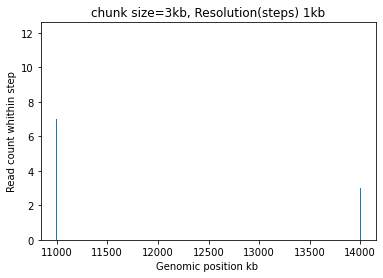

In [41]:
import matplotlib.pyplot as plt

import numpy as np

pos_candid_list_round_treshld_kb=[i/1000 for i in pos_candid_list_round_treshld]
plt.bar(pos_candid_list_round_treshld_kb,count_candid_list_round_treshld) 
#plt.xscale('log') # , nonposy='clip'
plt.title("chunk size=3kb, Resolution(steps) 1kb")
plt.ylabel("Read count whithin step")
plt.xlabel("Genomic position kb ") 
#plt.yticks([0,1,2])
#plt.xticks(fontsize=8)

#plt.savefig("/work/FAC/FBM/DBC/cdessim2/default/smajidi1/recombination/v8h1"+"_plot2.pdf")

plt.show()


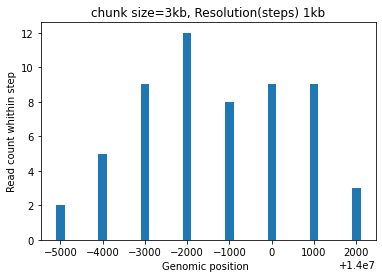

In [44]:

pos_candid_list_round_treshld2=[]
count_candid_list_round_treshld2= []
for i in range(len(pos_candid_list_round_treshld)):
    if pos_candid_list_round_treshld[i] > 13000000:
        pos_candid_list_round_treshld2.append(pos_candid_list_round_treshld[i])
        count_candid_list_round_treshld2.append(count_candid_list_round_treshld[i])
        

pos_candid_list_round_treshld_kb=[i for i in pos_candid_list_round_treshld2]
plt.bar(pos_candid_list_round_treshld_kb,count_candid_list_round_treshld2,width=200) 
#plt.xscale('log') # , nonposy='clip'
plt.title("chunk size=3kb, Resolution(steps) 1kb")
plt.ylabel("Read count whithin step")
plt.xlabel("Genomic position  ") 
#plt.yticks([0,1,2])
#plt.xticks(fontsize=8)

#plt.savefig("/work/FAC/FBM/DBC/cdessim2/default/smajidi1/recombination/v8h1"+"_plot2.pdf")

plt.show()


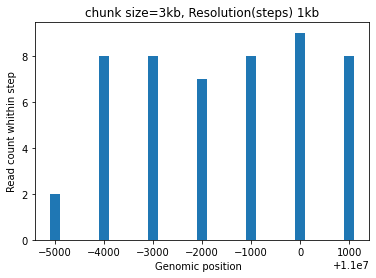

In [43]:

pos_candid_list_round_treshld2=[]
count_candid_list_round_treshld2= []
for i in range(len(pos_candid_list_round_treshld)):
    if pos_candid_list_round_treshld[i] < 13000000:
        pos_candid_list_round_treshld2.append(pos_candid_list_round_treshld[i])
        count_candid_list_round_treshld2.append(count_candid_list_round_treshld[i])
        

pos_candid_list_round_treshld_kb=[i for i in pos_candid_list_round_treshld2]
plt.bar(pos_candid_list_round_treshld_kb,count_candid_list_round_treshld2,width=200) 
#plt.xscale('log') # , nonposy='clip'
plt.title("chunk size=3kb, Resolution(steps) 1kb")
plt.ylabel("Read count whithin step")
plt.xlabel("Genomic position  ") 
#plt.yticks([0,1,2])
#plt.xticks(fontsize=8)

#plt.savefig("/work/FAC/FBM/DBC/cdessim2/default/smajidi1/recombination/v8h1"+"_plot2.pdf")

plt.show()


In [45]:

predicted_pos_final  = []
if num_candid>1:


    pos_candid_list_round_treshld = np.array(pos_candid_list_round_treshld)
    count_candid_list_round_treshld = np.array(count_candid_list_round_treshld)
    pos_candid_list_round_treshld_reshped = pos_candid_list_round_treshld.reshape(-1, 1)


    try:
        clustering = MeanShift(bandwidth=MeanShift_bandwidth,bin_seeding=True).fit(pos_candid_list_round_treshld_reshped)  # n_jobs= -1 using all cores.
        #print(clustering.labels_)
    except MemoryError:  # how to handle this?
        log_excepttion(MemoryError)
        exit(1)

    clusters_labels=clustering.labels_
    # cluster labels are not in order, the first one may be 1, next 0 next 2!  # array([1, 1, 0, 0, 0, 2, 2])
    cluster_unique, cluster_id = np.unique(clusters_labels, return_index=True)
    cluster_unique_order_preserved = cluster_unique[np.argsort(cluster_id)]

    for cluster_id  in cluster_unique_order_preserved:
        indices_this_cluster = np.where(clusters_labels == cluster_id)  # indices of alleles in the combined list which are estimated to be in this cluster
        pos_this_cluster = pos_candid_list_round_treshld[indices_this_cluster[0]]
        count_this_cluster = count_candid_list_round_treshld[indices_this_cluster]
        predicted_pos= round(sum(pos_this_cluster*count_this_cluster)/sum(count_this_cluster))
        predicted_pos_final.append(predicted_pos)
    print(predicted_pos_final)

else:
    print("No recombination spot is detected. ")


[10998400, 13998702]


In [47]:
pos_this_cluster

np.mean(

13998500.0

In [ ]:
pos_this_cluster

In [ ]:
pos_this_cluster

In [ ]:
count_this_cluster

In [ ]:
import matplotlib.pyplot as plt

plt.hist(pos_candid_list,bins=10000,width=10000) # , bins=10
#plt.show()
plt.savefig(file_add+"_plot.png")


In [ ]:
#len(pos_candid_list)


In [ ]:
mostFrequent_pos = max(set(pos_list), key = pos_list.count)

print(mostFrequent_pos)
second_pos_list=[i for  i  in pos_list if i!=mostFrequent_pos  ]

second_mostFrequent_pos = max(set(second_pos_list), key = second_pos_list.count)

print(second_mostFrequent_pos)

pos_list.count(mostFrequent_pos)

In [ ]:
plt.hist(pos_list,bins=1000,width=50000) # , bins=10
plt.show()
#plt.savefig(file_add+"_plot.png")


In [ ]:

thresh =30
pos_list_estimate_high = []
pos_list_estimate_unq=  list(set(pos_list_estimate))
    
for i in pos_list_estimate_unq:
    
    count_i = pos_list_estimate.count(i)
    if count_i>thresh :
        pos_list_estimate_high.append(i)
        
        
print(len(pos_list_estimate_high))

In [ ]:
pos_list_estimate_high[:3]

In [ ]:
import numpy as np
file_recomb_addrss="genetic_map_chr22_combined_b37.txt"


file_recomb= open(file_recomb_addrss,'r');


hot_list_pos_recomb=[]
hot_list_pos_rate=[]
hot_list_pos_cm = []

for line in file_recomb:
    line_strip = line.strip()
    
    if line_strip.startswith('p'):
        header1=line_strip
    else:
        
        vals = line_strip.split()   # last line of header contains sample name
        pos_recomb=vals[0]
        pos_rate=vals[1]
        pos_cm = vals[2]
        
        hot_list_pos_rate.append(float(pos_rate))
        hot_list_pos_recomb.append(int(pos_recomb))
        hot_list_pos_cm.append(float(pos_cm))
print(len(hot_list_pos_recomb))
print(len(hot_list_pos_rate), np.mean(hot_list_pos_rate),max(hot_list_pos_rate))
print(len(hot_list_pos_cm), np.mean(hot_list_pos_cm),max(hot_list_pos_cm))




In [ ]:

hot_list_pos_recomb_high=[]
hot_list_pos_rate_high= [ ]

for pos_i, pos_rate in enumerate(hot_list_pos_rate):
    
    
    if pos_rate>10:
        hot_list_pos_recomb_high.append(hot_list_pos_recomb[pos_i])
        hot_list_pos_rate_high.append(hot_list_pos_rate[pos_i])
        
        
print(len(hot_list_pos_recomb_high))

In [ ]:

plt.scatter(hot_list_pos_recomb,hot_list_pos_rate, s= .1) # , bins=10
plt.xlabel('genomic pos (bp)')
plt.ylabel('rate in (cM/Mb)')
plt.show()

#plt.savefig(file_add+"_plot.png")



In [ ]:

plt.scatter(hot_list_pos_recomb_high,hot_list_pos_rate_high, s= .1) # , bins=10
plt.xlabel('genomic pos (bp)')
plt.ylabel('rate in (cM/Mb)')
plt.show()

#plt.savefig(file_add+"_plot.png")



In [ ]:

file_add1="/users/smajidi1/"

plt.scatter(hot_list_pos_recomb_high,hot_list_pos_rate_high, s= .5) # , bins=10
plt.xlabel('genomic pos (bp)')
plt.ylabel('rate in (cM/Mb)')
for xc in pos_list_estimate_high:
    plt.axvline(x=xc,linewidth =.04,color="r")
    
plt.savefig(file_add1+"_plot.pdf")
    
    
    

In [ ]:
pos_list_estimate_high[:2]

In [ ]:

list_pos_overlap = pos_list

correct_pos=0
for pos_overlap in list_pos_overlap:
    
    for pos_recomb in list_pos_recomb_high:
        
        if pos_recomb < pos_overlap+500 and pos_recomb > pos_overlap-500 :
            correct_pos+=1
            
print(correct_pos,len(list_pos_overlap),len(list_pos_recomb_high)) 
    

In [ ]:
plt.scatter(pos_list) # , bins=10
plt.show()
#plt.savefig(file_add+"_plot.png")



In [ ]:
#for pos_overlap in list_pos_overlap:

pos_overlap= 16980000

for i in range(len(hot_list_pos_recomb)):
    pos_recomb= hot_list_pos_recomb[i]
    rate = hot_list_pos_rate [i]
    

    if pos_recomb < pos_overlap+5000 and pos_recomb > pos_overlap-5000 :
        print(pos_recomb,rate)

In [ ]:

list_pos_overlap = pos_list

correct_pos=0
for pos_overlap in list_pos_overlap:
    
    for pos_recomb in list_pos_recomb_high:
        
        if pos_recomb < pos_overlap+500 and pos_recomb > pos_overlap-500 :
            correct_pos+=1
            
print(correct_pos,len(list_pos_overlap),len(list_pos_recomb_high)) 
    

In [ ]:
correct_pos=0
for pos_overlap in list_pos_recomb_high:
    
    for pos_recomb in list_pos_recomb_high:
        
        if pos_recomb < pos_overlap+500 and pos_recomb > pos_overlap-500 :
            correct_pos+=1
            
print(correct_pos,len(list_pos_recomb_high),len(list_pos_recomb_high)) 
    

In [ ]:
list_pos_recomb_high